# Use DallE-3 to Generate an Image


In [1]:
!pip install -q openai==1.59.6 requests==2.32.3 pillow==11.1.0

In [5]:
import os

# Set the "OPENAI_API_KEY" in the Python environment. Will be used by OpenAI client later.
os.environ["OPENAI_API_KEY"] = "[OPENAI_API_KEY]"

# from google.colab import userdata
# os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY1')

In [6]:
from openai import OpenAI

client = OpenAI()

In [7]:
response = client.images.generate(
    model="dall-e-3",
    prompt="A computer scientist wearing a coat implementing a neural network while sitting behind a computer",
    size="1024x1024",
    quality="standard",
    n=1,
)

In [8]:
response

ImagesResponse(created=1737541656, data=[Image(b64_json=None, revised_prompt='A South Asian female computer scientist, attired in a formal coat, is diligently working on implementing a neural network. She is comfortably seated behind an advanced workstation, her fingers dancing across the keyboard, eyes locked on multiple vibrant screens displaying complex data visualizations and algorithms related to artificial intelligence. The room is quintessential of a tech lab, complete with modern minimalistic interiors, the glow from the screens and the soft hum of computers creating a dynamic ambiance.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-7B3VYtCFt3BduG3PRIJUl7pf/user-uApOpZZWIJLowuVrUxHnWdCE/img-uXj63JpPzPqm5jvZHNcNBAog.png?st=2025-01-22T09%3A27%3A36Z&se=2025-01-22T11%3A27%3A36Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-01-22T00%3A00%3A24Z&ske=2025-01-23T00%3

In [9]:
from PIL import Image
import requests
from io import BytesIO

# Fetch the image
response = requests.get(response.data[0].url)
response.raise_for_status()  # Check if the request was successful

# Open the image with Pillow
image = Image.open(BytesIO(response.content))

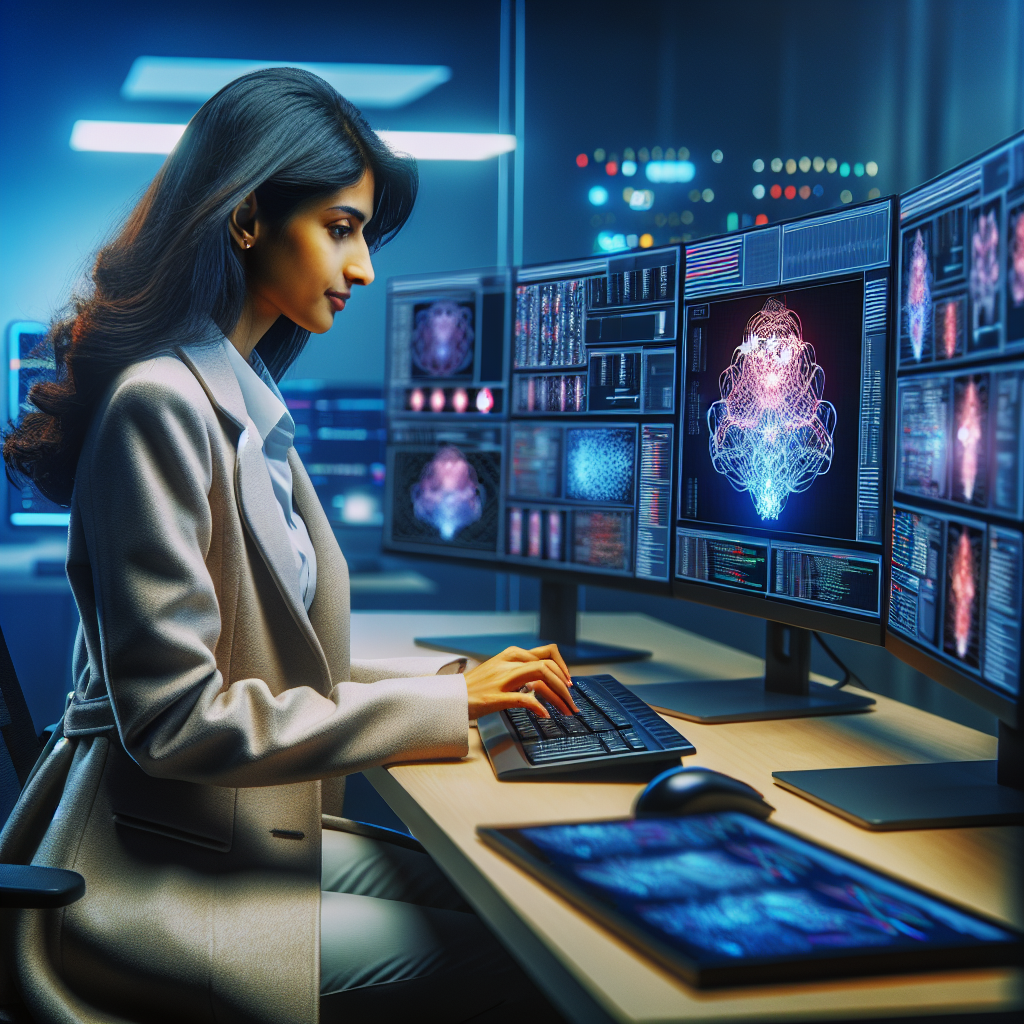

In [10]:
image

# ElevenLabs to Generate Voice


In [11]:
!pip install -q elevenlabs==1.50.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.4/228.4 kB 6.1 MB/s eta 0:00:00


In [12]:
# Set the "ELEVENLABS_API_KEY" as a variable. Will be used by ElevenLabs client later.
ELEVENLABS_API_KEY = "[ELEVENLABS_API_KEY]"

In [13]:
from elevenlabs.client import ElevenLabs

client = ElevenLabs(api_key=ELEVENLABS_API_KEY)

In [14]:
text = "Artificial Intelligence is the future!"

In [15]:
# Calling the text_to_speech conversion API with detailed parameters
response = client.text_to_speech.convert(
    voice_id="pNInz6obpgDQGcFmaJgB",  # Adam pre-made voice
    text=text,
    model_id="eleven_turbo_v2",  # use the turbo model for low latency, for other languages use the `eleven_multilingual_v2`
)

In [16]:
# Generating a unique file name for the output MP3 file
save_file_path = "voice.mp3"

In [17]:
# Writing the audio to a file
with open(save_file_path, "wb") as f:
    for chunk in response:
        if chunk:
            f.write(chunk)

print(f"{save_file_path}: A new audio file was saved successfully!")

voice.mp3: A new audio file was saved successfully!


In [18]:
from IPython.display import Audio, display

display(Audio(save_file_path, autoplay=True))